In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [4]:
df=pd.read_csv('UpdatedResumeDataSet.csv',encoding='utf-8')


In [5]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [6]:
df.shape

(962, 2)

In [7]:
df.iloc[3]

Category                                         Data Science
Resume      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
Name: 3, dtype: object

In [10]:
print(df.iloc[3,1])

Skills â¢ R â¢ Python â¢ SAP HANA â¢ Tableau â¢ SAP HANA SQL â¢ SAP HANA PAL â¢ MS SQL â¢ SAP Lumira â¢ C# â¢ Linear Programming â¢ Data Modelling â¢ Advance Analytics â¢ SCM Analytics â¢ Retail Analytics â¢Social Media Analytics â¢ NLP Education Details 
January 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology
January 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University
Data Science Consultant 

Consultant - Deloitte USI
Skill Details 
LINEAR PROGRAMMING- Exprience - 6 months
RETAIL- Exprience - 6 months
RETAIL MARKETING- Exprience - 6 months
SCM- Exprience - 6 months
SQL- Exprience - Less than 1 year months
Deep Learning- Exprience - Less than 1 year months
Machine learning- Exprience - Less than 1 year months
Python- Exprience - Less than 1 year months
R- Exprience - Less than 1 year monthsC

Input data

In [11]:
X=df['Resume']

Output data

In [12]:
y=df['Category']

<Axes: xlabel='count', ylabel='Category'>

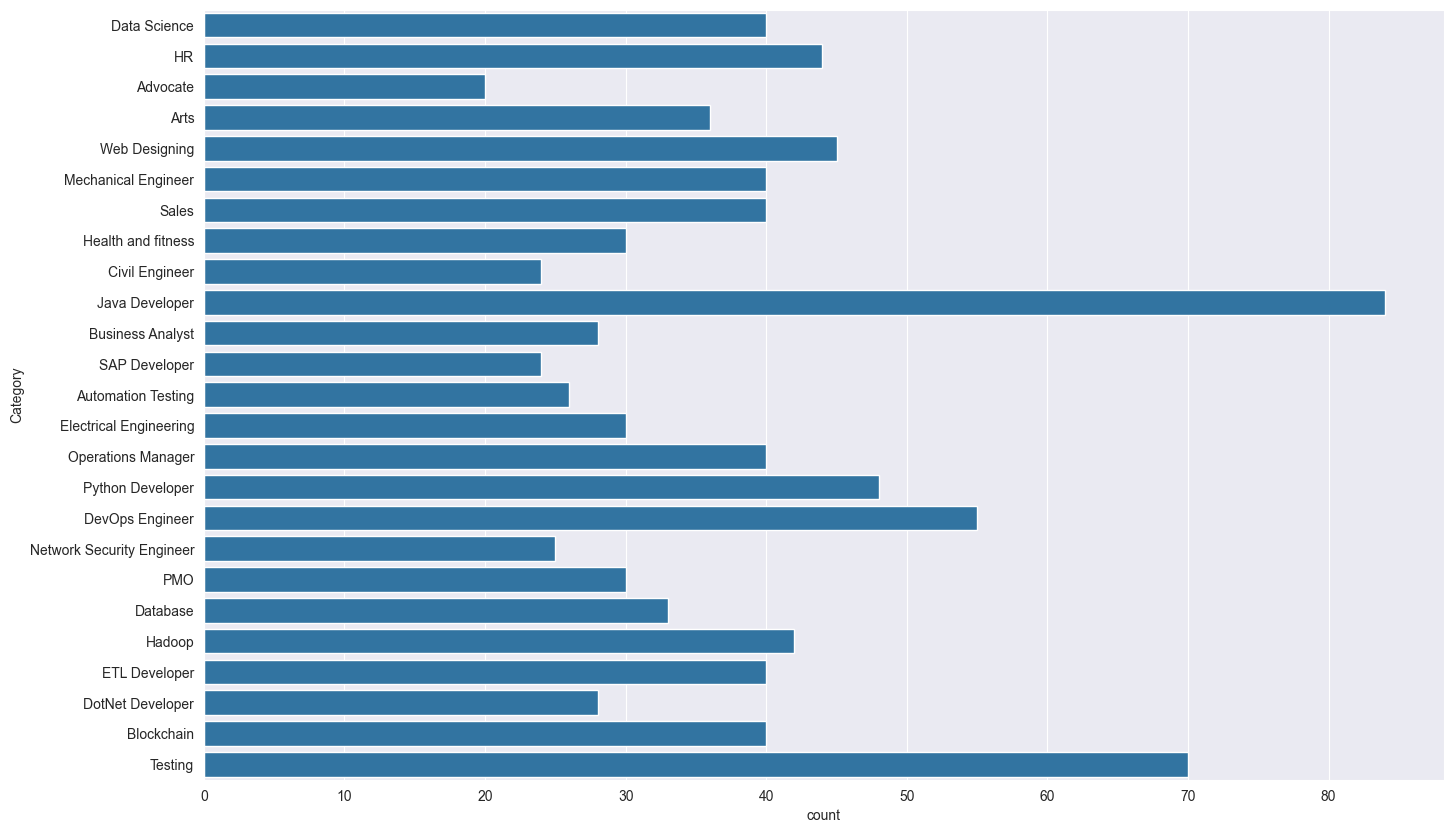

In [13]:
plt.figure(figsize=(16,10))
sns.countplot(y)

In [14]:
y.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

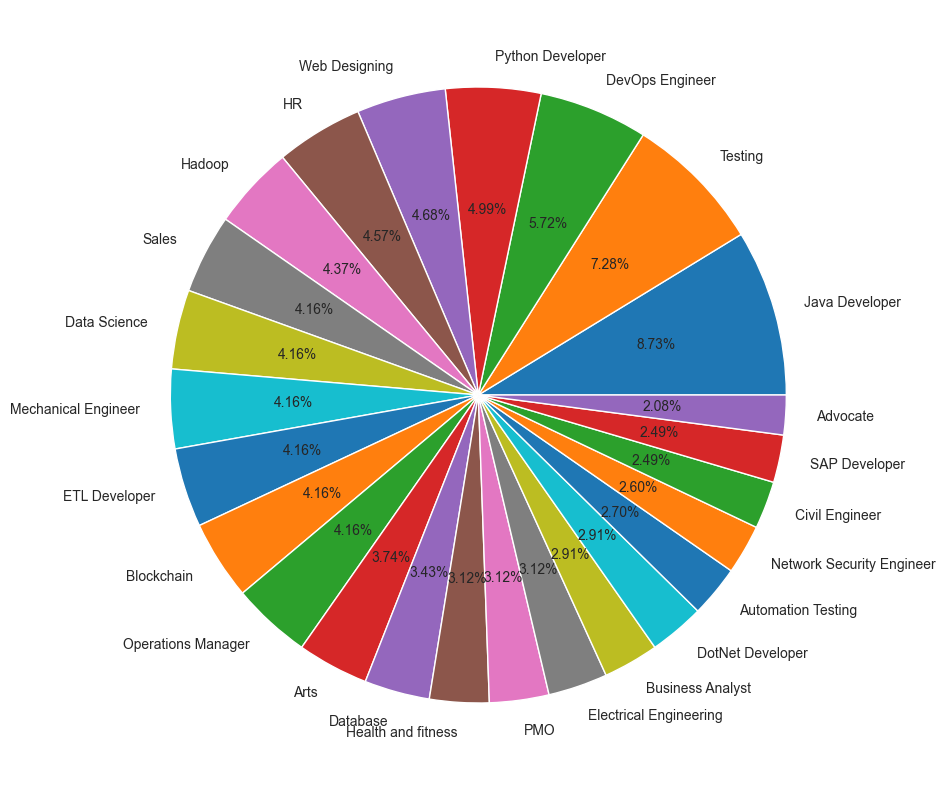

In [15]:
plt.figure(figsize=(10,10))
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%2.2f%%');

Defining the Cleaning Function

In [16]:
import re, string

In [40]:
def cleanResume(resumeText):
    resumeText=re.sub(r'http\S+\s*',' ',resumeText)  #URLs
    resumeText=re.sub('RT|cc',' ',resumeText)       #RT/CC
    resumeText=re.sub(r'#\S+',' ',resumeText)        #Hashtags
    resumeText=re.sub(r'@\S+',' ',resumeText)        #mentions and email-ids
    resumeText=re.sub('[%s]' %re.escape(string.punctuation),' ',resumeText) #remove punctuation
    resumeText=re.sub(r'[^\x00-\x7f]',r' ',resumeText)     #Keep ASCII
    resumeText=re.sub(r'\s+',' ',resumeText)         #Remove Extra white spaces
    resumeText=re.sub(r'[0-9]',r' ',resumeText)
    return resumeText

In [41]:
sent='हेलो  Hi! @mahesh how are you? क्या हाल हैं ?    Have you seen https://fb.com? जल्दी बोलो|'

In [42]:
cleanResume(sent)

' Hi how are you Have you seen '

In [43]:
cleanResume(X[0])

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D  js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular   Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience    months jQuery Exprience    months Python Exprience    monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [44]:
cleaned=X.apply(cleanResume)
cleaned_data=cleaned.sum()
cleaned_data;

In [45]:
len(cleaned_data)

2803381

In [46]:
from wordcloud import WordCloud

In [47]:
wcloud=WordCloud(background_color='white').generate(cleaned_data)

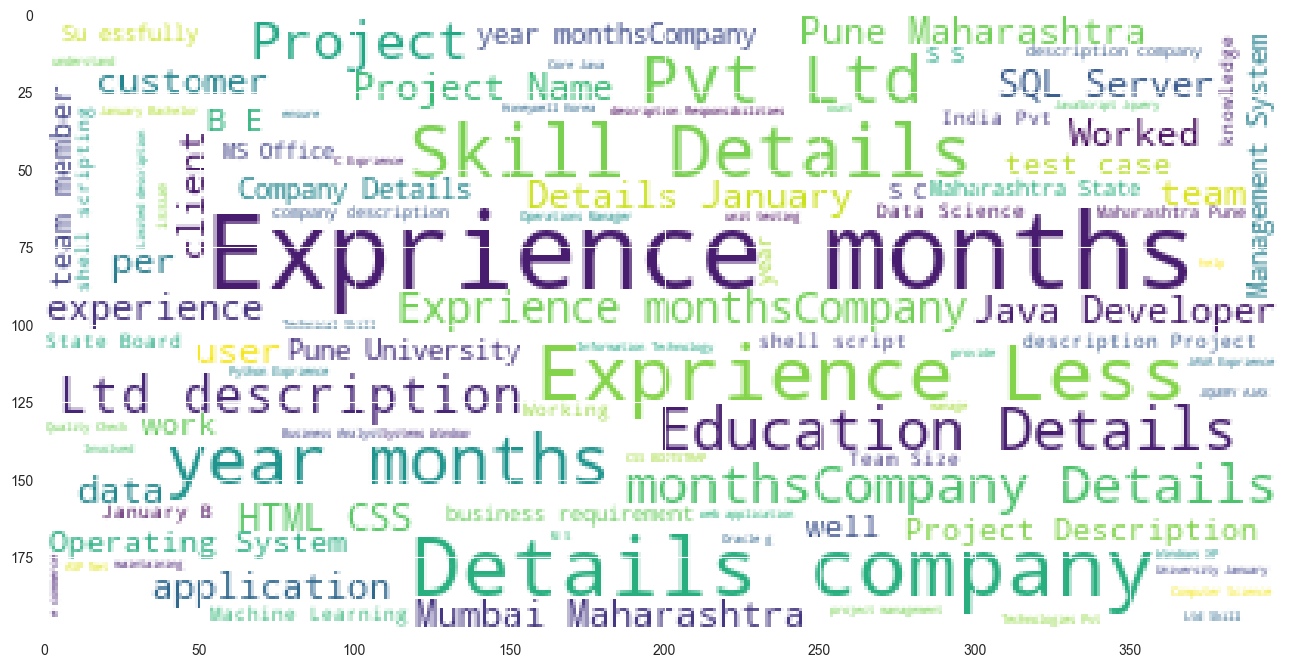

In [48]:
plt.figure(figsize=(16,10))
plt.imshow(wcloud)

In [49]:
cleaned.shape

(962,)

In [50]:
y.shape

(962,)

TF*IDF Vectorization

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf=TfidfVectorizer(stop_words='english')
x_new=tfidf.fit_transform(cleaned)

In [53]:
x_new.shape

(962, 7038)

In [54]:
tfidf.get_feature_names_out()

array(['aaa', 'aag', 'aakruti', ..., 'zone', 'zookeeper', 'zz'],
      shape=(7038,), dtype=object)

Cross-Validation

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test=train_test_split(x_new, y, test_size=0.25, random_state=0, stratify=y)

In [57]:
X_train.shape, X_test.shape

((721, 7038), (241, 7038))

Build The Model

In [58]:
from sklearn.neighbors import NearestCentroid

In [59]:
nc=NearestCentroid()

In [60]:
nc.fit(X_train,y_train)

C:\Users\dai\AppData\Roaming\Python\Python313\site-packages\sklearn\neighbors\_nearest_centroid.py:244: UserWarning: self.within_class_std_dev_ has at least 1 zero standard deviation.Inputs within the same classes for at least 1 feature are identical.
  warnings.warn(


,metric,'euclidean'
,shrink_threshold,None
,priors,'uniform'


In [61]:
nc.centroids_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01095111],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00879807, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(25, 7038))

In [64]:
y_pred=nc.predict(X_test)


Performance Analysis

In [65]:

print(classification_report(y_test,y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      0.83      0.91         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      0.90      0.95        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

<Figure size 2000x1500 with 0 Axes>

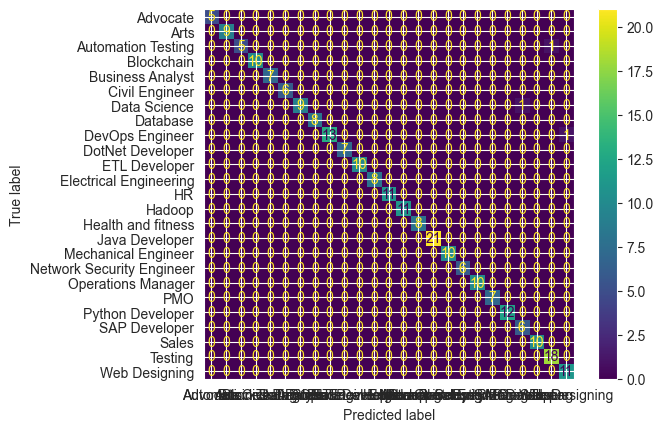

In [69]:
plt.figure(figsize=(20,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [71]:
with open('MyResume.txt','r',encoding='utf-8') as f:
    text=f.readlines()
text=' '.join(text)
text

'ISHAAN MALRA\n Competent, Flexible, Organized\n Phone: +916395933155\n Email: ishaanmalra@gmail.com\n LinkedIn: https:/www.linkedin.com/in/ishaan-malra-6b12971ba//\n GitHub: https://github.com/ishaan-eng\n CAREER OBJECTIVE\n A responsible and purposeful individual, seeking an opportunity for exposure to the industrial world, to leverage my\n technical and organizing skills productively.\n ACADEMIC BACKGROUND\n Year Qualification/ Degree Board/University Percentage/CGPA\n 2020-2024\n B.Tech in Computer Science\n Engineering- Specialization in Cloud\n Computing and Virtualization\n Technologies\n UPES- Dehradun, Uttarakhand 8.09\n 2018-2019 Class XII ISC 83%\n 2016-2017 Class X ICSE 92.3%\n Subject Electives Cloud Computing and Virtualization Technologies, DevOps, Digital Marketing\n Technical Proficiency/Skills \uf0b7 Java, Python, C\n \uf0b7 C#, HTML, CSS, JavaScript\n \uf0b7 SQL, Docker, Cloud, OpenStack, Agile Methodologies, Microservices,\n Virtualization\n \uf0b7 .NET Core, ASP.NE

In [72]:
cleaned_text=cleanResume(text)
cleaned_text

'ISHAAN MALRA Competent Flexible Organized Phone              Email ishaanmalra LinkedIn GitHub CAREER OBJECTIVE A responsible and purposeful individual seeking an opportunity for exposure to the industrial world to leverage my technical and organizing skills productively ACADEMIC BACKGROUND Year Qualification Degree Board University Percentage CGPA           B Tech in Computer Science Engineering Specialization in Cloud Computing and Virtualization Technologies UPES Dehradun Uttarakhand                Class XII ISC              Class X ICSE      Subject Electives Cloud Computing and Virtualization Technologies DevOps Digital Marketing Technical Proficiency Skills Java Python C C HTML CSS JavaScript SQL Docker Cloud OpenStack Agile Methodologies Microservices Virtualization NET Core ASP NET React Flutter Full Stack Development Web Application Development Web API MVC Summer Internship Work Experience NINTERNET Actively engaging in front end development contributing to the implementation

In [75]:
text_trns=tfidf.transform([cleaned_text])

In [76]:
y_pred=nc.predict(text_trns)
y_pred

array(['Data Science'], dtype=object)

In [78]:
with open("Sample_resume.txt", 'r', encoding='utf-8') as f:
    text=f.readlines()

text=' '.join(text)
cleaned_text = cleanResume(text)
text_trns = tfidf.transform([cleaned_text])
y_pred=nc.predict(text_trns)
y_pred

array(['Data Science'], dtype=object)

In [82]:
from spire.doc import Document
doc = Document('SPP.docx')
text = doc.GetText()
text

'Evaluation Warning: The document was created with Spire.Doc for Python.\r\nMr. Satish Prakashrao Pise\r\nEmail – satish.pise.sgp@gmail.com\t\t\t\tContact No. 9096679875,7768962144\r\nObjective\r\nWork with professional organization and contribute my excellent work with result oriented performance for continuous improvement in quality and development.  \r\nExperience – 6.3 Years\r\n1.  Current working in Sanjay Ghodawat Polytechnic, Kolhapur.\r\n* Post-Lecturer \r\n* Duration- 4.3 years, 1st June 2013 to till date\r\n* Responsibilities - Teaching, guiding, motivating students as a class teacher, lecturer, and working as a lab in-charge, spoken tutorial project, IIT Bombay coordinator.\r\nOrganizing and conducting trainings for students.\r\n* Subject Taught – RDBMS, CNE, CMF, CHM, CHN, NMA, LPR, DLS, GUI, BWP.\r\n2.  Samarth Polytechnic Belhe, Pune\r\n* Post-Lecturer(Ad-hoc)\r\n* Duration-8months, August 2012 to April 2013\r\n* Responsibilities – Teaching.\r\n* Subject Taught – CMF, MIS

In [83]:
cleaned_text = cleanResume(text)
text_trns = tfidf.transform([cleaned_text])
y_pred=nc.predict(text_trns)
y_pred

array(['Arts'], dtype=object)